<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Day 1 Workshop 2, SWDB 2023 </h1> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
    In a regression problem, we are given pairs of data points $(\vec{x}_i, y_i)$ where $i \in [1,N]$.  We want to develop a function $f(\vec{x})$ such that $f(\vec{x}_i)\approx y_i$ for each pair of points in the data set.
    </p>
    <p>
    The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the analysis.  They are often called "features".  The coefficients $w_j$ are called "weights".

You may be familiar with a version of linear regression where the functions $\phi$ are chosen to be the identity and a constant.  When the input space is one dimensional this is:

$f(x) = w x + b$
</p>
<p>
    This problem is defined by an "error function", whose minimization tries to force the function $f$ to approximate the data points $y_i$ on the inputs $\vec{x}_i$.  This error function is

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $
</p>
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  http://scikit-learn.org/stable/
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We're going to provide a simple example with fake data and then use the same model to fit data from the Brain Observatory.  The model we fit will be an $n$th order polynomial of a single variable:
</p>
<p>
$f_n(x) = \sum_{i=0}^n a_i x^i$
</p>
<p>
i.e.
</p>
<p>
$f_1(x) = a_0 + a_1 x$
</p>
<p>
$f_2(x) = a_0 + a_1 x + a_2x^2$
</p>
<p>
$\dots$
</p>
<p>
First we generate some example data.  This will be the true model of the data.  (In a real problem, we won't know this function; we're trying to fit it.)
</p>
<p>
$F(x) = sin(2\pi x)$
</p>
</div>

Text(0.5, 0, 'x')

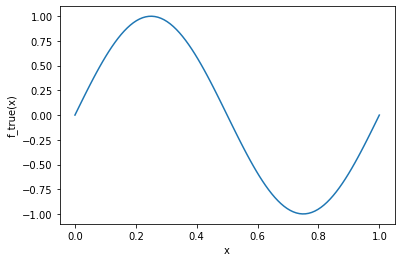

In [2]:
x0 = np.linspace(0,1.0, 100)

def f_true(xt): 
    return np.sin(2.0*np.pi*xt)

fig, ax = plt.subplots()
ax.plot(x0, f_true(x0))
ax.set_ylabel('f_true(x)')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we generate some 'data' from this function.
    </p>
    </div>

Text(0.5, 0, 'x')

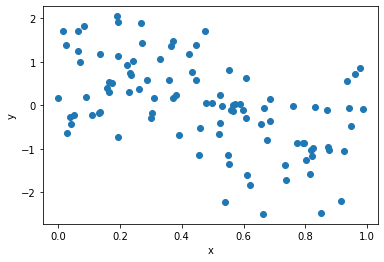

In [3]:
n = 100

x = np.sort(np.random.random(n))
y = f_true(x) + 1.0*np.random.normal(size=n)

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_ylabel('y')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Fitting a first order polynomial.</h3>
</p>
<p>
Before we fit any models, we need to separate the data into train, validate, and test sets.  This is so that we can train the model (train), perform model comparison (validate), and test the performance of the model (test).
</p>
<p>
`scikit-learn` has a function we can use called `train_test_split`.  We use this function twice in order to generate a validation set.
</p>
</div>

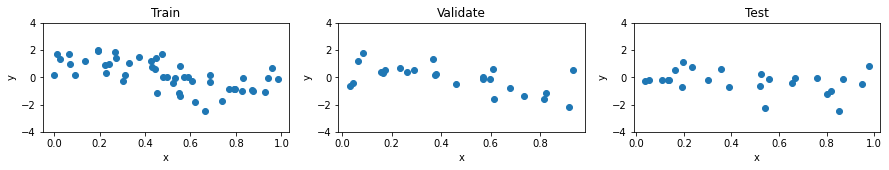

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x, y, train_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, test_size=0.5)

fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(x_train, y_train, 'o')
ax[1].plot(x_validate, y_validate, 'o')
ax[2].plot(x_test, y_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In ordert to fit the model, we need to create the object that will manage the fitting.  We are going to use the `LinearRegression` model from `sklearn.linear_model`.  Fitting works by calling the `fit` method with the data.
</p>
</div>

In [5]:
from sklearn.linear_model import LinearRegression as LR

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We reshape `x` in the `fit` method because it expects a two dimensional array of shape (samples, dimensions).
</p>
</div>

In [6]:
lr = LR()
lr.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we compare the result to the validation set.
</p>
</div>

(-4.0, 4.0)

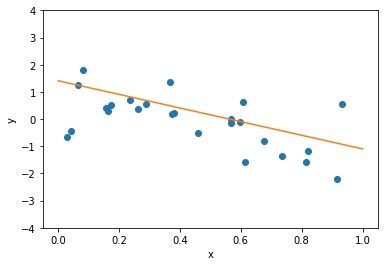

In [7]:
fig, ax = plt.subplots()
ax.plot(x_validate, y_validate, 'o')
ax.plot(x0.reshape(-1,1), lr.predict(x0.reshape(-1,1)), '-')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(-4,4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
That doesn't seem right.  Let's try multiple orders of polynomials so that we can compare them with the validation set.
</p>
<p>
     We define a function `nth_polynomial` in order to create input data whose rows are data points and whose columns are the terms in the polynomial ($x$, $x^2$, $x^3$, $\dots$)
</p>
</div>

In [8]:
def nth_polynomial(x, n):
    return np.stack([x**i for i in range(1, n+1)], axis=1)

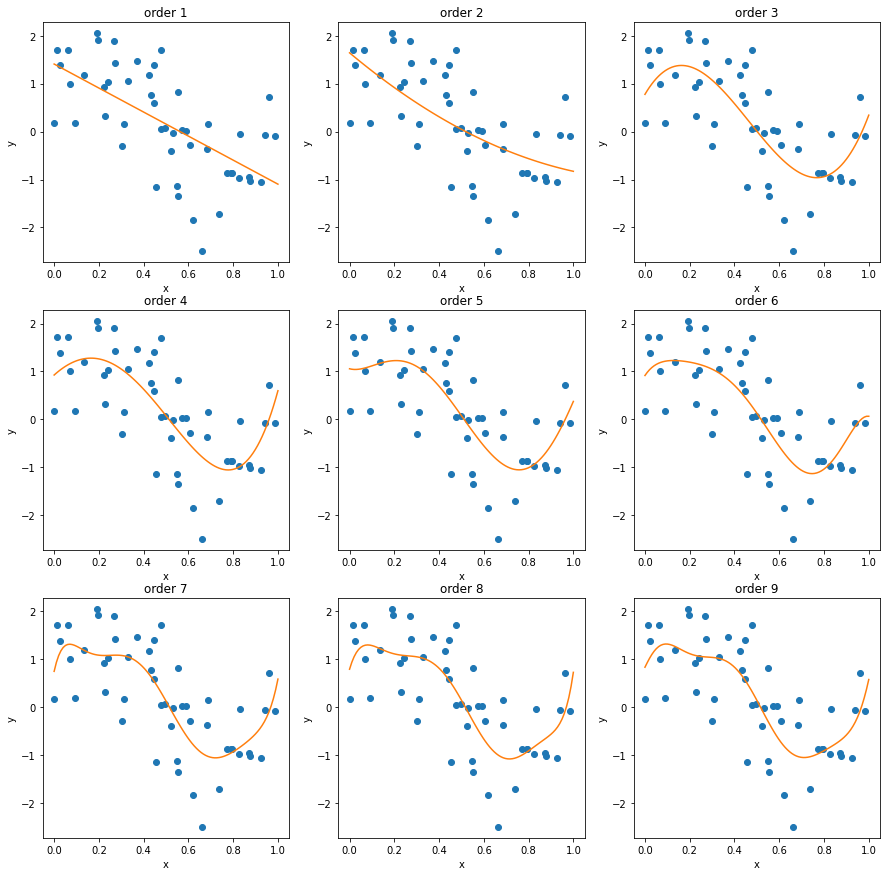

In [9]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    lr.fit(x_nth, y_train)
    
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_train, y_train, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we plot them against the validation set.
</p>
</div>

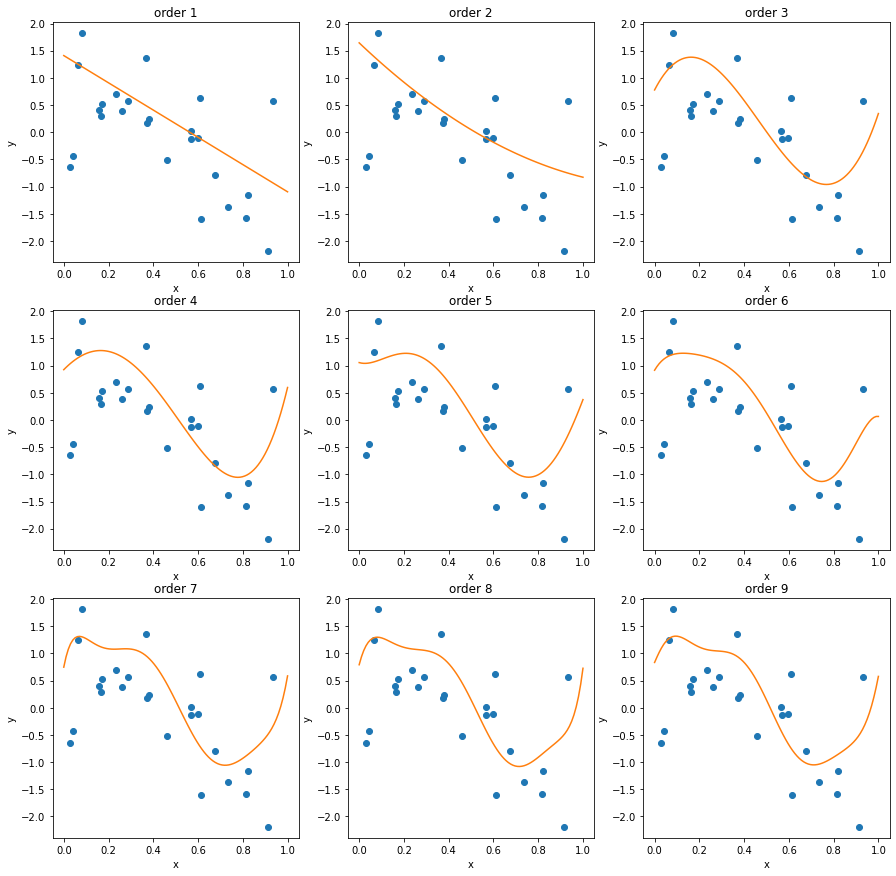

In [10]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_validate, y_validate, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To be more precise, we compute the score, which for this model is the $R^2$ of the fit.
</p>
</div>

Best model is order:  4


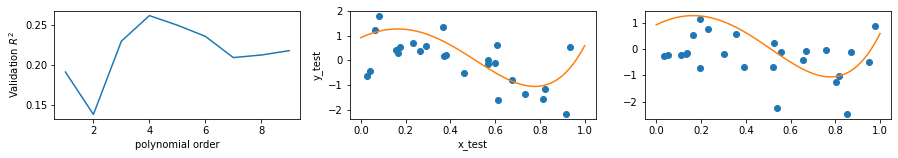

In [11]:
R2_vals = []

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_validate, i+1)
    R2 = lr.score(x_nth, y_validate)
    R2_vals.append(R2)

order = np.arange(1,max_order+1)
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(x_validate, y_validate, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax[1].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_validate')
ax[1].set_xlabel('x_validate')


ax[2].plot(x_test, y_test, 'o')
ax[2].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_test')
ax[1].set_xlabel('x_test')

print("Best model is order:  {}".format(best_model_index+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h2>Cross validation</h2>
<p>
`scikit-learn` has facilities for making cross-validation quite simple.  Here we show performing cross_validation with the functions `cross_validate` and `KFold`.  `cross_validate` performs cross validation and returns a dictionary of scores over folds.  `KFold` provides an iterator that produces indices that split the data into train and test folds.
</p>
<p>
In the following, we'll ignore the data set we labeled "validate" above.  This is just for simplicity, so I don't have extra code recreating data sets.  The data being used for validation here is part of the cross validation separation of the training set in the code below.
</p>
</div>

In [12]:
from sklearn.model_selection import cross_validate

Text(0.5, 0, 'polynomial order')

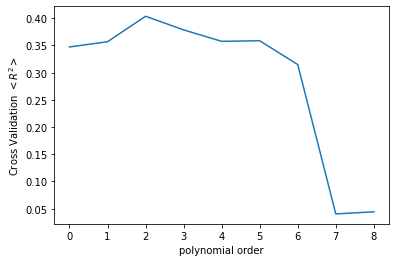

In [14]:
cv_mean_error = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    cv_dict = cross_validate(lr, x_nth, y_train, cv=4)
    cv_mean_error[i] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We can do the same analysis with `KFold`.
</p>
</div>

In [15]:
from sklearn.model_selection import KFold

Text(0.5, 0, 'polynomial order')

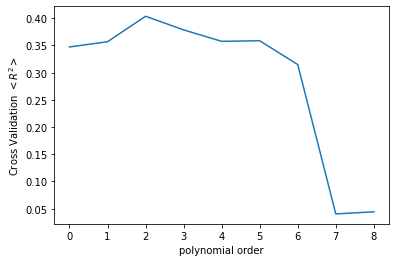

In [16]:
folds = KFold(n_splits=4)

scores = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], i+1)
        lr.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], i+1)
        scores_temp.append(lr.score(x_nth, y_train[test]))
    scores[i] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now that we know the best model, we can apply it to the test data.
</p>
</div>

Text(0.5, 0, 'x_test')

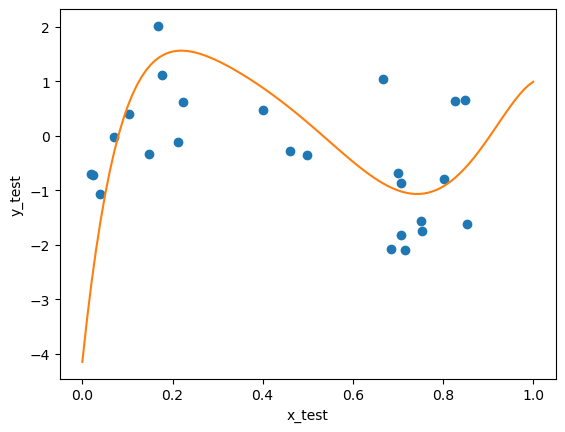

In [16]:
best_model_index = np.argmax(scores)
lr_best = lr_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
lr_best.fit(x_nth, y_train)

fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax.plot(x0, lr_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now let's try a simple example with the Allen Brain Observatory Visual Coding Dataset.  We will try regressing the neural activity (using dF/F) against the running speed of the animal.  

#This needs a bigger header to distinguish the section. And unpack the question a bit more. What are we trying to achieve? Why? Eg. it reads now as we have a tool, let's hit this data with the tool because we can. What's the scientific question we're trying to answer and why is regression a good approach to this?  
</p>
</div>

In [17]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = '../data/allen-brain-observatory/visual-coding-2p/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [20]:
#what is this? why is it here? 

def downsample(a, bin_edges, alt_array=None):
    n = len(bin_edges)-1
    a_downsampled = np.zeros(n)
    if alt_array is not None:
        alt_downsampled_list = [np.zeros(n) for t in alt_array]
    for i in range(n):
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        bin_mask = np.logical_and(a >= lower, a < upper)
        a_masked = a[bin_mask]
        if len(a_masked)>0:
            a_downsampled[i] = np.mean(a_masked)
        else:
            a_downsampled[i] = 0
        if alt_array is not None:
            for j in range(len(alt_array)):
                vals = alt_array[j][bin_mask]
                if len(vals)>0:
                    alt_downsampled_list[j][i] = np.mean(vals)
                else:
                    alt_downsampled_list[j][i] = 0
            # alt_downsampled[i] = [np.mean(alt_array[bin_mask])
        
    if alt_array is not None:
        return a_downsampled, alt_downsampled_list
    else:
        return a_downsampled

The next two cells get the running speed and dff_trace for a neuron from the Visual Coding Two-Photon Dataset

In [18]:
#this can be streamlined - don't need to get container id, just get session id using the cell id
#and I believe we decided to use a better expt, no?
#also this gets all the dff traces, not the one for one neuron. Which is fine, but make sure you are clear about what it's doing

exp_cont = boc.get_experiment_containers(ids=[571684731])

container_id = 564425775
cell_id = 570927732

# # container_id = 571684731
# # cell_id = 572611384

eid = boc.get_ophys_experiments(session_types=['three_session_A'], experiment_container_ids=[container_id])[0]['id']
data = boc.get_ophys_experiment_data(eid)
cell = data.get_cell_specimen_indices([cell_id])[0]

dx, time = data.get_running_speed()
time, dff = data.get_dff_traces()

In [ ]:
# useful to plot the data here

Text(0, 0.5, 'DFF (%)')

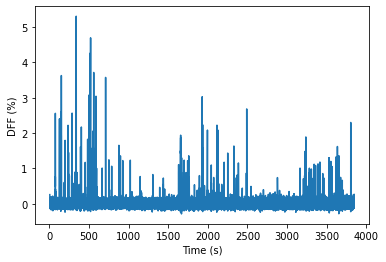

In [21]:
plt.plot(time, dff[cell,:])
plt.xlabel("Time (s)")
plt.ylabel("DFF (%)")

Text(0, 0.5, 'Running speed (cm/s)')

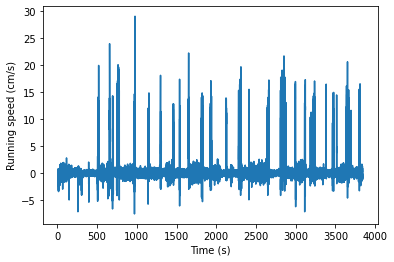

In [19]:

plt.plot(time, dx)
plt.xlabel("Time (s)")
plt.ylabel("Running speed (cm/s)")

In [22]:
#This would be a good place (with a better cell) to again motivate the question of regressing running speed and activity. This isn't a good example, I have no expectation that the two are related. But just looking at the data, what should we expect?

In [22]:
L = dx.shape[0]

dx_train = dx[:L//2]
dx_validate = dx[L//2:3*L//4]
dx_test = dx[3*L//4:]

dff_train = dff[:,:L//2]
dff_validate = dff[:,L//2:3*L//4]
dff_test = dff[:,3*L//4:]

print((L, dff.shape[1]))

(115721, 115721)


Text(0.5, 0, 'acquisition frame (VC) or time (VB)')

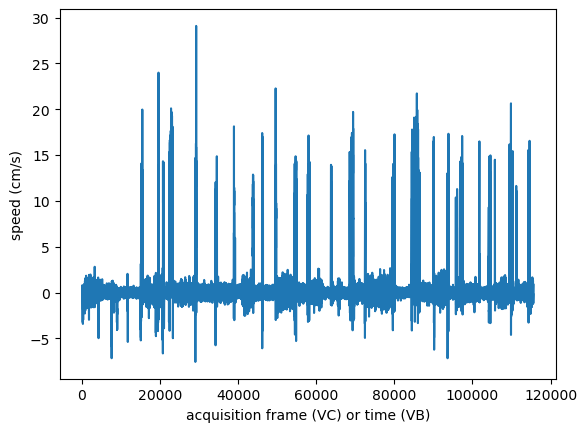

In [23]:
fig, ax = plt.subplots()
ax.plot(dx)
ax.set_ylabel('speed (cm/s)')
ax.set_xlabel('acquisition frame (VC) or time (VB)')

Text(0.5, 0, 'Running Speed (cm/s)')

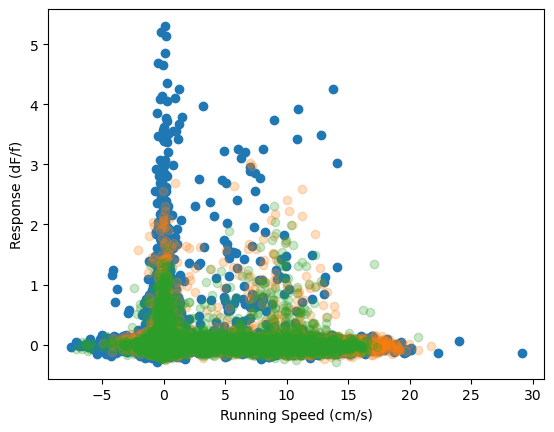

In [24]:
fig, ax = plt.subplots()
ax.plot(dx_train, dff_train[cell],'o', label='train')
ax.plot(dx_validate, dff_validate[cell],'o',alpha=0.25, label='validate')
ax.plot(dx_test, dff_test[cell],'o',alpha=0.25, label='test')
ax.set_ylabel('Response (dF/f)')
ax.set_xlabel('Running Speed (cm/s)')

Try changing the bin numbers in the cell below.

In [25]:
bin_edges = np.linspace(0,40,100) # np.linspace(0,18,100)

running_ds_train, dff_ds_train = downsample(dx_train, bin_edges, [dff_train[cell]])
running_ds_validate, dff_ds_validate = downsample(dx_validate, bin_edges, [dff_validate[cell]])
running_ds_test, dff_ds_test = downsample(dx_test, bin_edges, [dff_test[cell]])

dff_ds_train = dff_ds_train[0]
dff_ds_validate = dff_ds_validate[0]
dff_ds_test = dff_ds_test[0]

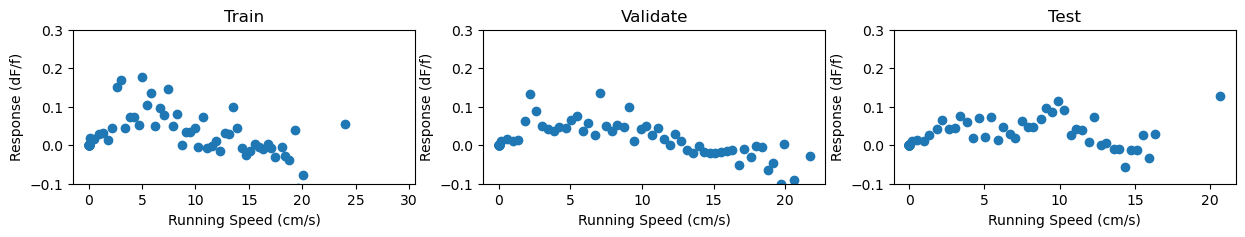

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(running_ds_train, dff_ds_train, 'o')
ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
ax[2].plot(running_ds_test, dff_ds_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-0.1, 0.3)
    ax[i].set_xlabel('Running Speed (cm/s)')
    ax[i].set_ylabel('Response (dF/f)')

In [27]:
lr_order1 = LR()
lr_order1.fit(running_ds_train.reshape(-1,1), dff_ds_train)

LinearRegression()

In [28]:
lr_order1.intercept_, lr_order1.coef_

(0.023468063513621996, array([-0.00144594]))

Text(0, 0.5, 'Response (dF/f)')

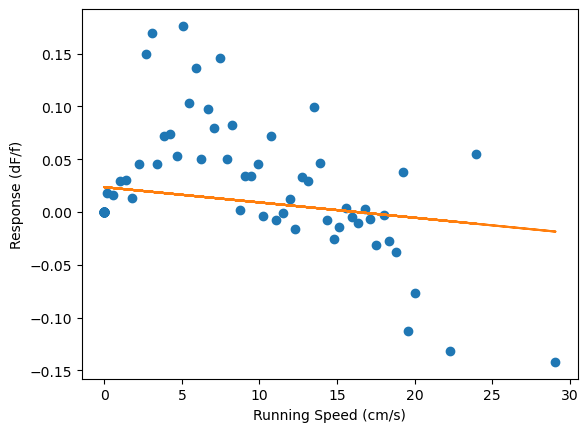

In [29]:
fig, ax = plt.subplots()
ax.plot(running_ds_train, dff_ds_train, 'o')
ax.plot(running_ds_train.reshape(-1,1), lr_order1.predict(running_ds_train.reshape(-1,1)))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

In [30]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    lr.fit(running_nth_order, dff_ds_train)

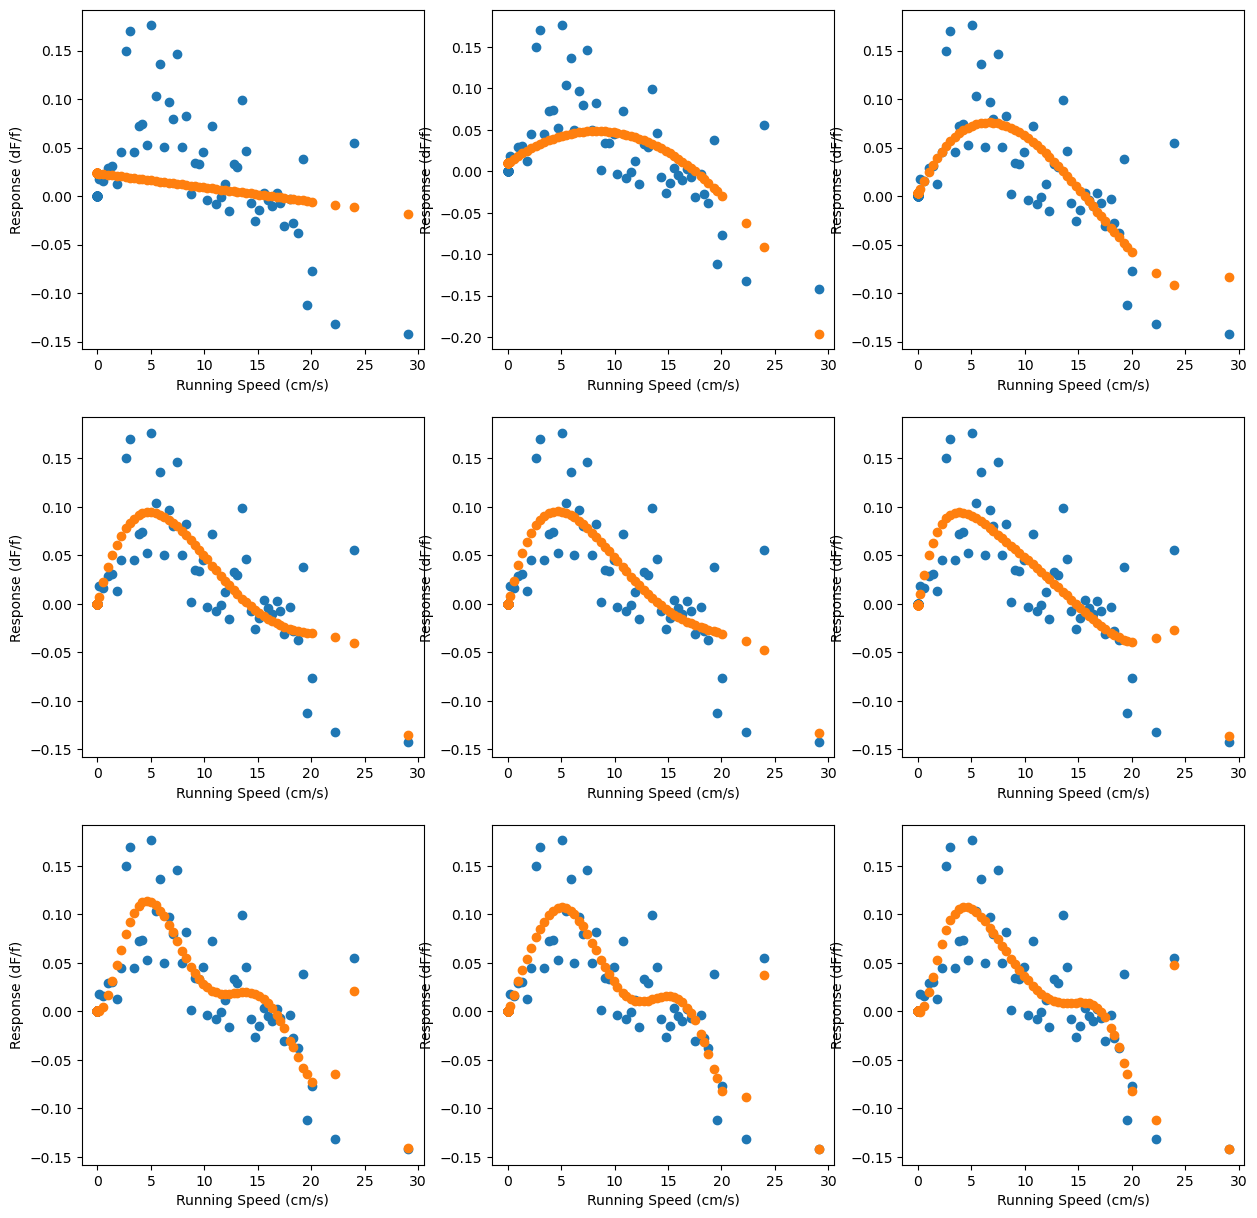

In [31]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    ax[yi, xi].plot(running_ds_train, dff_ds_train, 'o')
    ax[yi, xi].plot(running_ds_train, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

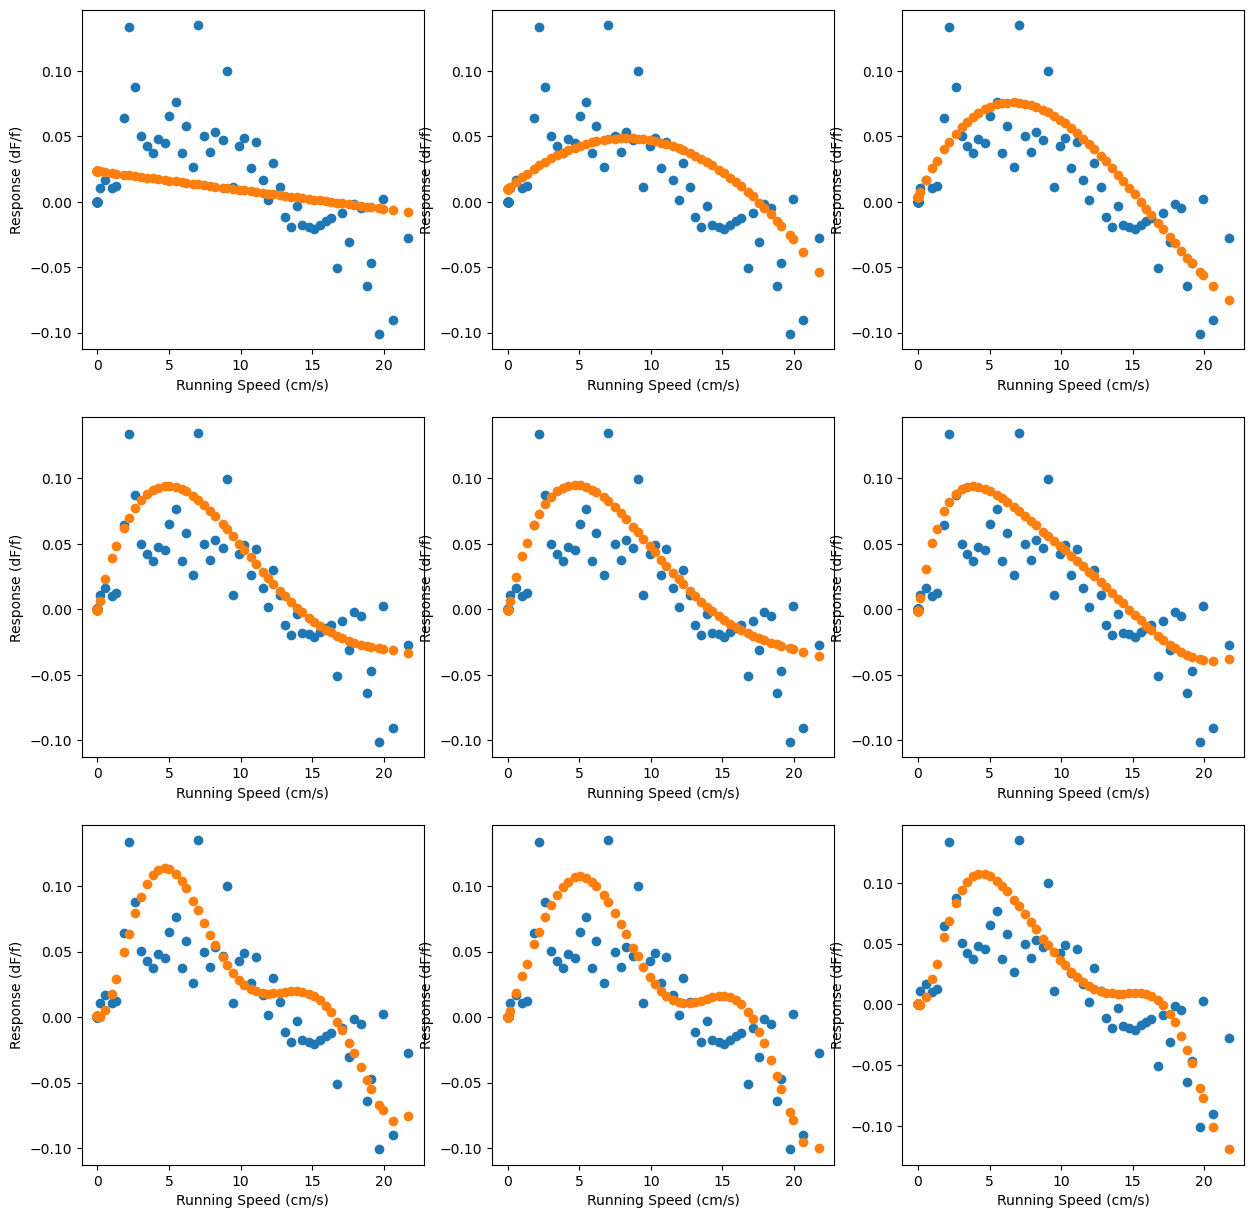

In [32]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    ax[yi, xi].plot(running_ds_validate, dff_ds_validate, 'o')
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    ax[yi, xi].plot(running_ds_validate, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

(-0.1, 0.2)

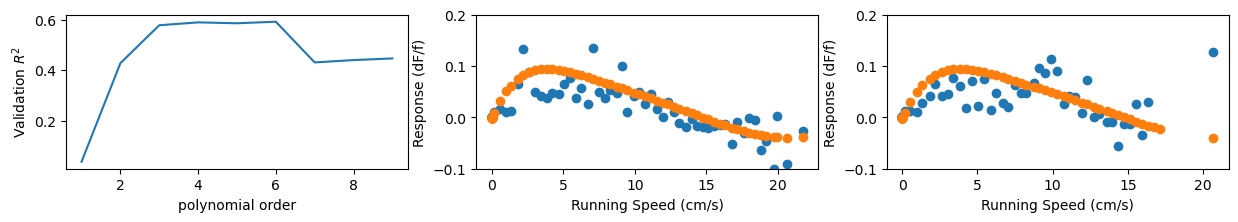

In [33]:
R2_vals = []

for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    R2 = lr.score(running_nth_order, dff_ds_validate)
    R2_vals.append(R2)
    
order = np.arange(1,len(R2_vals)+1)
    
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
running_nth_order = nth_polynomial(running_ds_validate, best_model_index+1)
ax[1].plot(running_ds_validate, lr_best.predict(running_nth_order),'o')
ax[1].set_xlabel('Running Speed (cm/s)')
ax[1].set_ylabel('Response (dF/f)')
ax[1].set_ylim(-0.1, 0.2)

ax[2].plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
ax[2].plot(running_ds_test, lr_best.predict(running_nth_order),'o')
ax[2].set_xlabel('Running Speed (cm/s)')
ax[2].set_ylabel('Response (dF/f)')
ax[2].set_ylim(-0.1, 0.2)

In [34]:
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
print(lr_best.score(running_nth_order, dff_ds_test))

-0.13241495355620225


Text(0, 0.5, 'Response (dF/f)')

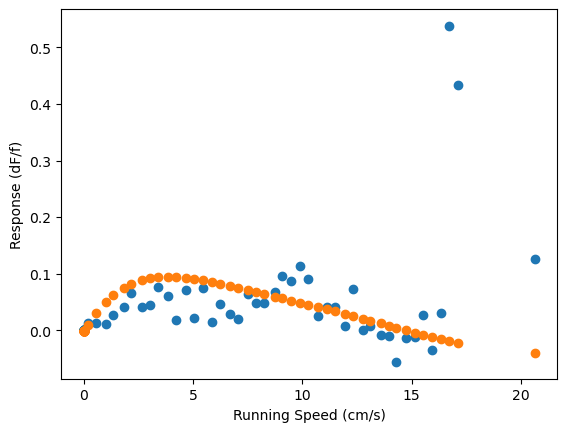

In [35]:
fig, ax = plt.subplots()

ax.plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test, best_model_index+1)
ax.plot(running_ds_test, lr_best.predict(running_nth_order),'o')
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Casting tuning curve prediction as a regression problem</h2>
<p>The above procedures provide a powerful and generalizable framework for modeling observations as a function of one or more predictor variables. To illustrate this, we may now revisit our tuning curve modeling exercise from the morning session. We will start by formalizng this exercise using our new regression framework. We'll then see how this framework allows us to easily combine tuning curve and running speed predictors into a single predictive model.  
    
Before we get started, we must address one important difference between the regression problems we've discussed above, and the tuning curve regression that we'd like to perform. Specifically, our tuning curve predictions are based on a categorical rather than continuous variable (i.e., one of eight possible orientations). In other words, as above, we seek a model of the form:

$$y = \beta x+C$$,

where $y$ is the calcium response, $X$ is now the stimulus information, and $\beta$ and $C$ are constants. However, this $X$ is a categorical variable.

One way to handle this would be to construct a separate model for each orientation:
$$y = \beta_1 X_1+C_1$$
$$y = \beta_2 X_2+C_2$$
$$\vdots$$
$$y = \beta_8 X_8+C_6$$.

Mathematically, though, this is a pain - we would need to look up which equation to use each time we want to predict new data. A more elegant alternative would be to model things piecewise.

$$y = \begin{cases} 
\beta_1 X & is & 1  \\
\beta_2 X & is & 2 \\
\vdots \\
\beta_8 X & is & 8
\end{cases} + C $$

Notice that, in this formulation, we merged the constants into one value, $C$. $C$ is, effectivly, the offset from zero for any model we fit.

Importantly, $X$ here is just the stimulus identity - it is therefore, always 1! What changes is which term in the equation we are operating with. This type of problem is called "One-Hot" encoding, because $X$ encodes what part of the equation is active. Mathematically, we implement this by creating a vector for each sample and setting $X_i = 1$ for whichever case is true. For example, if we had just two stimulus types, we might have: 

$$ X_1 = [1,0] $$
$$ X_2 = [0,1] $$ 

Finally, if we have many observations, we can stack each of these $X$ obeservations to form a "Design Matrix." 

We will have a corresponding fitting parameter vector, $$\beta = [\beta_1,\beta_2,\ldots,\beta_8]$$

Our whole problem can now be written: 
$$y = \beta X$$ 

    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Let's begin by revisiting our tuning curve analysis.    
</div>

In [36]:
import pandas as pd

expt_container_id = 564425775
cell_id = 570927732

boc = BrainObservatoryCache(manifest_file=manifest_file)
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
expt_session_info_df = pd.DataFrame(expt_session_info)
expt_session_info_df

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,567734055,175,VISl,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),121,564425775,three_session_B,283147,Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147,True
1,564425777,175,VISl,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),106,564425775,three_session_A,283147,Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147,True
2,566752133,175,VISl,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),116,564425775,three_session_C2,283147,Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147,True


In [37]:
session_id = expt_session_info_df[expt_session_info_df.session_type=='three_session_A'].id.iloc[0]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [38]:
gratings = boc.get_ophys_experiment_analysis(ophys_experiment_id=session_id, stimulus_type='drifting_gratings')
gratings.dfftraces.shape

(274, 115721)

In [39]:
cell_idx = np.where(cell_id==gratings.cell_id)[0][0]

this_dff = gratings.dfftraces[cell_idx]

In [40]:
stim_table = gratings.stim_table
stim_table.head()

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,315.0,0.0,734,794
1,2.0,0.0,0.0,825,885
2,15.0,315.0,0.0,915,975
3,2.0,225.0,0.0,1006,1066
4,15.0,270.0,0.0,1096,1156


In [41]:
orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
response = np.zeros((len(stim_table),60))
for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    response[ii,:] = this_dff[stim_table.start[ii]:stim_table.start[ii]+60]

As we did this morning, we'll just stick with just the temporal frequency we were looking at before.

In [42]:
orientation = orientation[temp_freq==2]
response = response[temp_freq==2,:]

In [43]:
orientations,ix = np.unique(orientation,return_inverse=True)
print(orientations)

[  0.  45.  90. 135. 180. 225. 270. 315.]


In [44]:
orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
mean_response_all = np.zeros((len(stim_table),len(gratings.cell_id)))
for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    for cc in range(len(gratings.cell_id)):
        this_response =  gratings.dfftraces[cc][stim_table.start[ii]:stim_table.start[ii]+60]
        mean_response_all[ii,cc] = this_response.mean()

mean_response_all = mean_response_all[temp_freq==2,:]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Let's now try to recast this problem in the regression framework. The first step is to turn these stimuli into a design matrix that we can use to predict responses. Remember that the design matrix can be constructed in many different ways, e.g., by evaluating polynomials of varying degree for each of the orientations. For simplicity, here we'll just use "identity functions" -- making this a basic linear regression problem.
</div>

In [45]:
# Lets build a matrix for every stimulus condition
stims = np.vstack([orientation,temp_freq]).T

# Each stimulus condition has a unique identity
stimuli,stim_index,counts = np.unique(stims,axis=0,return_counts=True,return_inverse=True)

# How many are there?
print(len(stimuli))


41


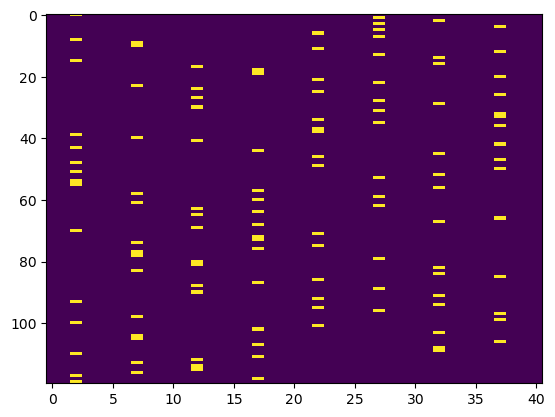

In [46]:
# Build the design matrix
X = np.zeros((len(stim_table),len(stimuli)))
for ii in range(len(stim_table)):
    X[ii,stim_index[ii]] = 1
    
X = X[temp_freq==2,:]

fig,ax = plt.subplots()
ax.imshow(X,aspect='auto')
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Now, to split up our data once more. Recall that there are many ways to do this, with k-fold cross-validation being a particularly elegant strategy. For simplicity here, we will go back to our simple "train-test" split based on the first and second halves of the data.
</div>

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#mean_response = response.mean(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, mean_response_all, test_size=0.5, random_state=42)

In [48]:
rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [49]:
scr_train = rfmodel.score(X_train,y_train)
scr_train

0.19946756548667188

In [50]:
scr_test = rfmodel.score(X_test,y_test)
scr_test

-0.22927659716365112

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In general, we see that model performance is worse in test data as compared to training data. Of course, this is expected -- our model was optimized for the training data!
</p>

<p>
So, how we can improve model performance? One approach might be to include predictor variables that could aid in our ability to model neuronal responses. A common observation is that the behavioral state of the mouse -- in particular, whether or not is currently running -- can alter the responses of neurons to visual stimuli. We'll dig into this topic a bit more on Day 5. For now, let's just see if adding running information can improve our model performance.
</p>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Multiple linear regression: combining stimulus orientation and running speed</h2>
<p> We now have a precise quantification of how well tuning information predicts variability in the visual responses (as measured by calcium fluorescence). We now wish to see whether running speed can improve our model performance. Ideally, we'd like to systematically re-evaluate polynomial order in the context of tuning information, as the "best order" can change. In the interest of time, though, we'll stick with the best-performing model that we learned above.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's start by examing how running speed varies over the course of the session.

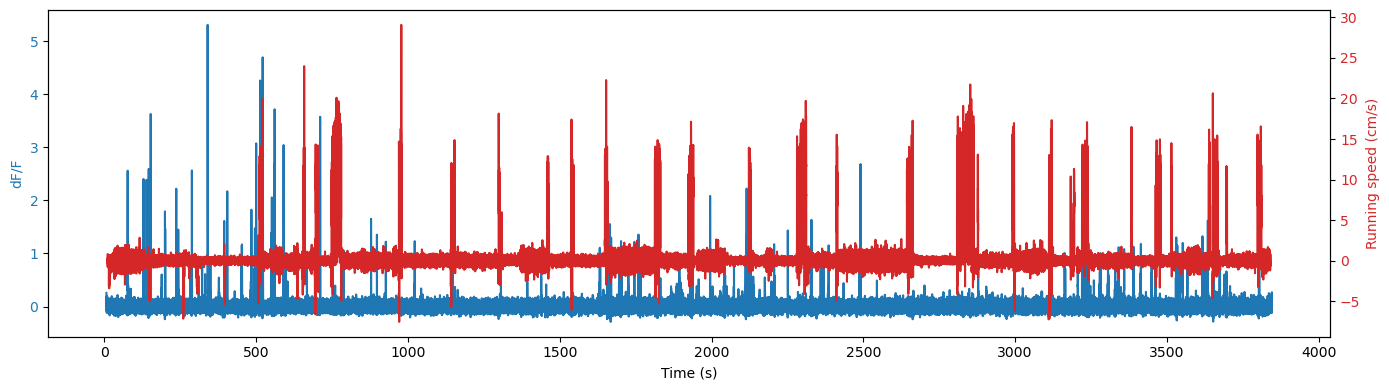

In [51]:
# Load running speed
dx, dxtime = data_set.get_running_speed()

# Let's plot running speed alongside the calcium trace we've been studying.
fig, ax1 = plt.subplots(figsize=(14,4))

color1 = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('dF/F', color=color1)
ax1.plot(gratings.timestamps, this_dff, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Running speed (cm/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(dxtime, dx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Looks like our mouse runs in short bursts that are distributed pretty evenly throughout the session.</p>

<p>
To get a better sense of how locomotion relates to the stimulus responses, let's start by splitting up trials into "running" and "still" and see whether our tuning curve changes.
</p>
</div>

In [52]:
spd = np.zeros((len(stim_table),60))
for ii in range(len(stim_table)):
    spd[ii,:] = dx[stim_table.start[ii]:stim_table.start[ii]+60]

spd = spd[temp_freq==2,:]

mean_spd = spd.mean(axis=1)
run_mask = mean_spd>0
still_mask = mean_spd<=0

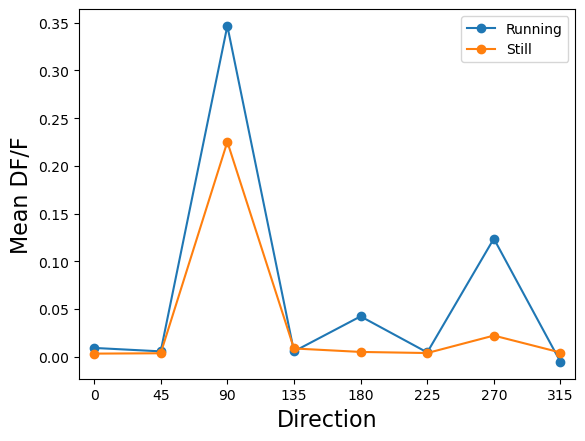

In [53]:
## Reconstruct tuning curve, separating "running" vs. "still" trials
mean_response = response.mean(axis =1)
tuning_run = np.zeros(orientations.shape)
tuning_still = np.zeros(orientations.shape)
for ii in range(orientations.shape[0]):
    tuning_run[ii] = mean_response[(ix==ii) & run_mask].mean()
    tuning_still[ii] = mean_response[(ix==ii) & ~run_mask].mean()
    
fig,ax = plt.subplots()
ax.plot(orientations,tuning_run, 'o-', label='Running')
ax.plot(orientations,tuning_still, 'o-', label='Still')
ax.set_xticks(orientations)
ax.set_xlim(-10,325)
ax.set_xlabel("Direction", fontsize=16)
ax.set_ylabel("Mean DF/F", fontsize=16)
plt.legend()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Looks like there's responses tend to be stronger during locomotion! Of course, this is simply an initial impression...it remains unclear whether this apparent effect is stronger than expected by chance, and if so, whether it generalizes well to unseen data. To answer these questions, we'll now look to incorporate running speed (as a continuous variable) into our regression model.
</div>

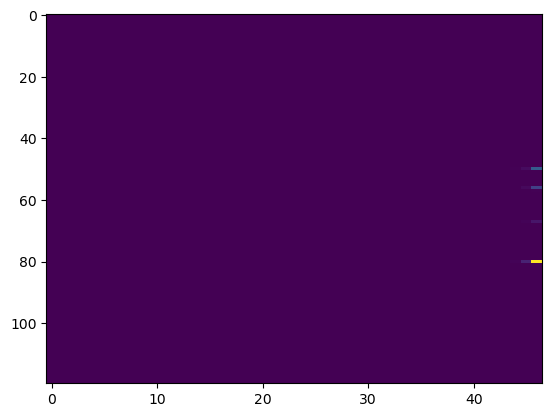

In [54]:
# Let's start by constructing a new design matrix, "Xspd", that now includes running speed.   

mean_spd = spd.mean(axis=1).reshape(-1,1) # mean speed during each trial
running_nth_order = np.squeeze(nth_polynomial(mean_spd, best_model_index+1))

Xspd = np.concatenate((X,running_nth_order), axis=1) # add column for run speed predictor; for binarized, replace mean_spd w/ run_mask.reshape(-1,1)

fig,ax = plt.subplots()
ax.imshow(Xspd,aspect='auto')

In [55]:
# Now to update our train-test split with the new design matrix

mean_response = response.mean(axis=1)

X_train, X_test, y_train, y_test = train_test_split(Xspd, mean_response_all, test_size=0.5, random_state=42)

rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [56]:
scr_train = rfmodel.score(X_train,y_train)
scr_train

0.3312512069525653

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Great! With just tuning information we had accounted for ~20% of variance in the training data set, so this is an improvement.

In [57]:
scr_test = rfmodel.score(X_test,y_test)
scr_test

-506125.4132151873

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> What happened?! It seems we've run into the issue of "overfitting" -- we've complicated our model by including a nonlinear function of running speed as a predictor. This certainly improved our performance on training data; however, it appears to have severely hampered generalization.
    
Accuracy vs. generalizability is a standard trade-off encountered in machine learning problems. This is why domain-specific knowledge is generally valuable when constructing predictive models -- such models can be made arbitrarily complex; however, well-motivated selection of predictor variables and construction of the design matrix goes a long way toward enabling models that are both accurate and generalizable.